In [1]:
import joblib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp

from mlp_ensemble import MlpEnsemble

#### **Getting training & validation data**

In [2]:
df_train = pd.read_csv('../databases/training.csv')
df_valid = pd.read_csv('../databases/validation.csv')

In [3]:
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']
X_val, y_val = df_valid.drop(['IND_BOM_1_1'], axis=1), df_valid['IND_BOM_1_1']

#### **MLP Ensemble**

In [4]:
models_params = [
    {
        'hidden_layer_units': 32,
        'hidden_layers': 1,
        'learning_rate': 0.0001,
        'max_iter': 2000,
        'batch_size': 128,
        'activation': 'tanh',
        'optimizer': 'Adam',
        'output_activation': 'sigmoid',
        'loss_function': 'mse',
        'dropout_rate': 0.5
    },
    {
        'hidden_layer_units': 32,
        'hidden_layers': 1,
        'learning_rate': 0.01,
        'max_iter': 10000,
        'batch_size': 128,
        'activation': 'sigmoid',
        'optimizer': 'Adam',
        'output_activation': 'sigmoid',
        'loss_function': 'mse',
        'dropout_rate': 0.5
    }
]

In [8]:
input_dimension = X_train.shape[1]

ensemble_model = MlpEnsemble(models_params, input_dimension)

In [9]:
ensemble_model.input_dimension

243

In [10]:
ensemble_model.fit(X_train, y_train, X_val, y_val)

Epoch 1/2000
1977/1977 [==============================] - 5s 2ms/step - loss: 0.2154 - accuracy: 0.6607 - val_loss: 0.2098 - val_accuracy: 0.6671
Epoch 2/2000
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.6723 - val_loss: 0.2075 - val_accuracy: 0.6718
Epoch 3/2000
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2063 - accuracy: 0.6747 - val_loss: 0.2070 - val_accuracy: 0.6724
Epoch 4/2000
1977/1977 [==============================] - 5s 2ms/step - loss: 0.2058 - accuracy: 0.6760 - val_loss: 0.2071 - val_accuracy: 0.6727
Epoch 5/2000
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2054 - accuracy: 0.6772 - val_loss: 0.2063 - val_accuracy: 0.6743
Epoch 6/2000
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2051 - accuracy: 0.6775 - val_loss: 0.2060 - val_accuracy: 0.6758
Epoch 7/2000
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2048 - accuracy: 0.6786 - val_loss: 0.2059 -

### **Model evaluation**

In [11]:
y_pred = ensemble_model.models[0].predict(X_val)

4257/4257 [==============================] - 5s 1ms/step


In [12]:
y_pred = np.round(y_pred)

In [13]:
accuracy_score(y_val, y_pred)

0.6816139547176461

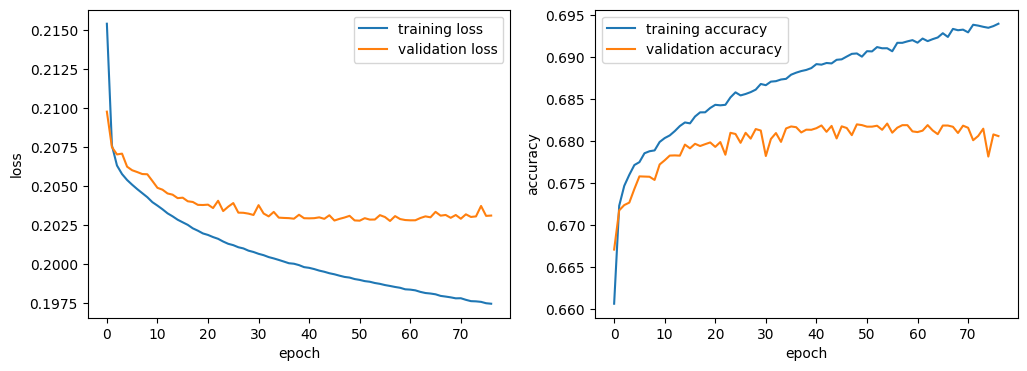

In [14]:
history = ensemble_model.histories[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [19]:
ks_statistic, p_value = ks_2samp(y_pred.flatten(), y_val)

In [20]:
ks_statistic

0.1649340733562388

In [21]:
p_value

0.0

In [ ]:
# joblib.dump(ensemble_model, 'ensemble.pkl')